# Handwriting Recognition

## About Data

The data set is from https://www.kaggle.com/datasets/landlord/handwriting-recognition and it consists of more than 400,000 handwritten names collected through charity projects.

Character recognition uses image processing technology to convert characters in scanned documents into digital forms. Machine-printed fonts generally perform well. However, machine recognition of handwritten characters is still a challenge because of the large differences in individual writing methods.
We will perform the task of recognizing handwritten names from these data.

There are 206,799 first names and 207,024 last names. The data was divided into training sets (331,059), test sets (41,382), and validation sets (41,382). The inspection of each data set will be conducted more intensively in the EDA stage.

## Deep Learning Problem

Handwriting recognition, or handwriting OCR, is a technology that translates handwritten input to corresponding digital text. It involves the automatic conversion of text in an image into letter codes which are usable within computer and text-processing applications. The data obtained by this form is regarded as a static representation of handwriting. Handwriting recognition is comparatively difficult because different people have different handwriting styles.

The goal of this problem is to build a machine learning model that recognizes the handwriting letters and converts the names into digital text. For this, we will build and train a model (or several models to compare), check the performance of the model, and make predictions using deep learning method.

## Exploratory Data Analysis (EDA)

### Importing Libraries and Data Set

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Reshape, Dense, BatchNormalization, Bidirectional, LSTM, Lambda, Activation
from keras import backend as K
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load train and valid data set
train = pd.read_csv('/kaggle/input/handwriting-recognition/written_name_train_v2.csv')
valid = pd.read_csv('/kaggle/input/handwriting-recognition/written_name_validation_v2.csv')
test = pd.read_csv('/kaggle/input/handwriting-recognition/written_name_test_v2.csv')

### Data Inspection

In [3]:
# The first part of train data set
train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [4]:
# Brief information of train data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


The train data set has 2 columns, FILENAME and IDENTITY, and 330961 rows.
* FILENAME: A given file name in order for each image.
* IDENTITY: A texted name for each handwriting image.

The data type of the columns are object and there are some null values in the column of IDENTITY.

In [5]:
# Brief information of valid data set
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB


The valid data set also has 2 columns, FILENAME and IDENTITY, and with the rows of 41370. The data type of the columns are object and there are some null values in the column of IDENTITY.

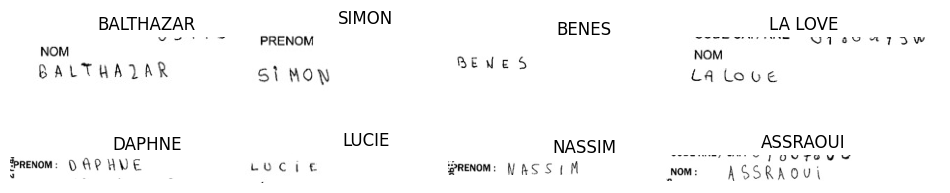

In [6]:
# Display sample data
plt.figure(figsize = (12, 6))

for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    img_dir = '/kaggle/input/handwriting-recognition/train_v2/train/' + train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title(train.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')
    
plt.subplots_adjust(wspace = -0.2, hspace = -0.7)

### Data Visualization

In [7]:
list = list(train.columns)

list_cate = []
for i in list:
    if train[i].dtype == 'object':
        list_cate.append(i)
        
le = LabelEncoder()

for i in list_cate:
    train[i] = le.fit_transform(train[i])
    
X = train.drop('FILENAME',axis=1)
y = train['FILENAME']

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

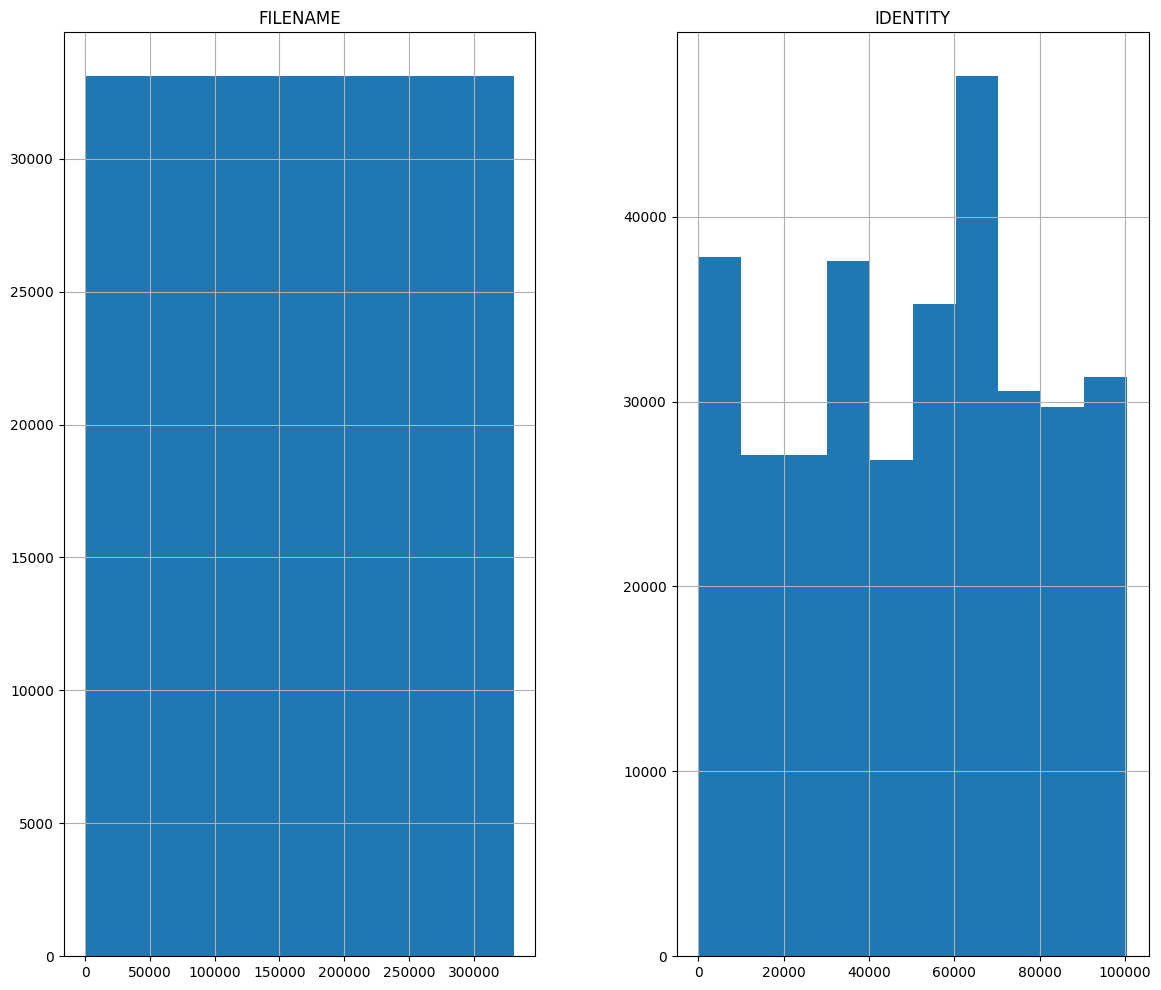

In [8]:
# Histogram
train.hist(figsize = (14,12))
plt.show()

In [9]:
# Correlations between factors
train.corr()

,FILENAME,IDENTITY
FILENAME,1.000000,0.000332
IDENTITY,0.000332,1.000000


<Axes: >

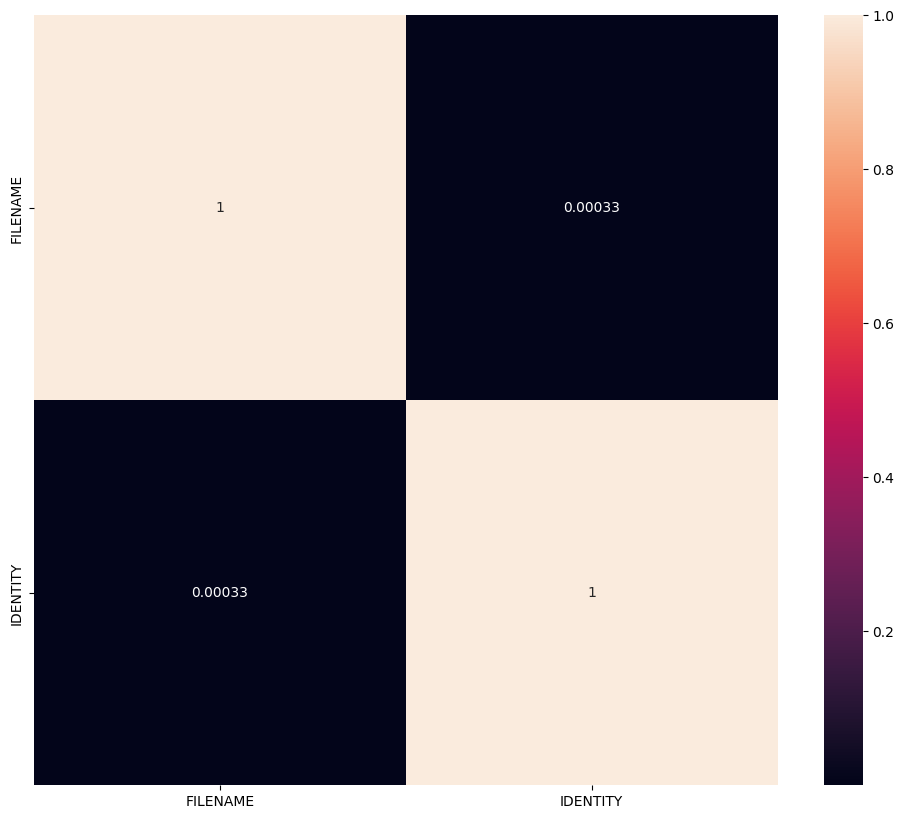

In [10]:
# Heatmap
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(), annot = True)

### Data Cleaning and Preprocessing

In [11]:
# Load train and valid data set
train = pd.read_csv('/kaggle/input/handwriting-recognition/written_name_train_v2.csv')
valid = pd.read_csv('/kaggle/input/handwriting-recognition/written_name_validation_v2.csv')
test = pd.read_csv('/kaggle/input/handwriting-recognition/written_name_test_v2.csv')

In [12]:
# Drop null values
train = train.dropna()
valid = valid.dropna()
test = test.dropna()

In [13]:
# Drop unreadable images
train = train[train['IDENTITY'] != 'UNREADABLE']
valid = valid[valid['IDENTITY'] != 'UNREADABLE']
test = test[test['IDENTITY'] != 'UNREADABLE']

In [14]:
# Convert lower case to upper case
train['IDENTITY'] = train['IDENTITY'].str.upper()
valid['IDENTITY'] = valid['IDENTITY'].str.upper()
test['IDENTITY'] = test['IDENTITY'].str.upper()

In [15]:
# Reset index
train.reset_index(inplace = True, drop = True)
valid.reset_index(inplace = True, drop = True)
test.reset_index(inplace = True, drop = True)

In [16]:
# Image preprocessing
def image_preprocessing(img):
    (h,w) = img.shape
    final_img = np.ones([64,256])*255
    if w > 256:             # crop the image if it is larger than this dimension
        img = img[:, :256]
    if h > 64:
        img = img[:64, :]
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

train_size = 30000
valid_size = 3000
test_size = 3000

train_x = []
valid_x = []
test_x = []

for i in range(train_size):
    image = cv2.imread('../input/handwriting-recognition/train_v2/train/'+train.loc[i, 'FILENAME'], cv2.IMREAD_GRAYSCALE)
    image = image_preprocessing(image)
    image = image/255.
    train_x.append(image)

for i in range(valid_size):
    image = cv2.imread('../input/handwriting-recognition/validation_v2/validation/'+valid.loc[i, 'FILENAME'], cv2.IMREAD_GRAYSCALE)
    image = image_preprocessing(image)
    image = image/255.
    valid_x.append(image)
    
for i in range(test_size):
    image = cv2.imread('../input/handwriting-recognition/test_v2/test/'+test.loc[i, 'FILENAME'], cv2.IMREAD_GRAYSCALE)
    image = image_preprocessing(image)
    image = image/255.
    test_x.append(image)

train_x = np.array(train_x).reshape(-1, 256, 64, 1)
valid_x = np.array(valid_x).reshape(-1, 256, 64, 1)
test_x = np.array(test_x).reshape(-1, 256, 64, 1)

In [17]:
# Character preprocessing
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 24
num_characters = len(alphabets) + 1
num_of_timestamps = 64

def name_to_num(name):
    name_num = []
    for char in name:
        name_num.append(alphabets.find(char))
    return np.array(name_num)

def num_to_name(num):
    name = ""
    for char in num:
        if char == -1:
            break
        else:
            name += alphabets[char]
    return name

train_y = np.ones([train_size, max_str_len]) * -1
train_name_len = np.zeros([train_size,1])
train_input_len = np.ones([train_size,1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_name_len[i] = len(train.loc[i, 'IDENTITY'])
    train_y[i, 0:len(train.loc[i, 'IDENTITY'])] = name_to_num(train.loc[i, 'IDENTITY'])
    
valid_y = np.ones([valid_size, max_str_len]) * -1
valid_name_len = np.zeros([valid_size,1])
valid_input_len = np.ones([valid_size,1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_name_len[i] = len(valid.loc[i, 'IDENTITY'])
    valid_y[i, 0:len(valid.loc[i, 'IDENTITY'])] = name_to_num(valid.loc[i, 'IDENTITY'])

test_y = np.ones([test_size, max_str_len]) * -1
test_name_len = np.zeros([test_size,1])
test_input_len = np.ones([test_size,1]) * (num_of_timestamps-2)
test_output = np.zeros([test_size])

for i in range(3000):
    test_name_len[i] = len(test.loc[i, 'IDENTITY'])
    test_y[i, 0:len(test.loc[i, 'IDENTITY'])] = name_to_num(test.loc[i, 'IDENTITY'])

## Analysis Using Deep Learning Models

### Build a model

In [18]:
# Build CRNN model
input_data = Input(shape=(256,64,1), name ='input')

# CNN
inner = Conv2D(32, (3,3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2,2), name='max1')(inner)

inner = Conv2D(64, (3,3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2,2), name='max2')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3,3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1,2), name='max3')(inner)
inner = Dropout(0.3)(inner)

# CNN to RNN
inner = Reshape(target_shape=((64,1024)), name='reshape')(inner)
inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

# RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name='lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name='lstm2')(inner)

# Output
inner = Dense(num_characters, kernel_initializer='he_normal', name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 64, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 256, 64, 32)       320       
                                                                 
 batch_normalization (Batch  (None, 256, 64, 32)       128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 256, 64, 32)       0         
                                                                 
 max1 (MaxPooling2D)         (None, 128, 32, 32)       0         
                                                                 
 conv2 (Conv2D)              (None, 128, 32, 64)       18496     
                                                             

In [19]:
# Loss function and compile
def ctc_lambda_func(args):
    y_pred, names, input_length, name_length = args
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(names, y_pred, input_length, name_length)

names = Input(name='gtruth_names', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
name_length = Input(name='name_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, names, input_length, name_length])
model_final = Model(inputs=[input_data, names, input_length, name_length], outputs=ctc_loss)
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(learning_rate=0.0001))

### Train the model

In [20]:
model_final.fit(x = [train_x, train_y, train_input_len, train_name_len], y = train_output,
                validation_data = ([valid_x, valid_y, valid_input_len, valid_name_len], valid_output),
                epochs = 10, batch_size = 128)

Epoch 1/10


2023-12-12 17:19:01.130732: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


235/235 [==============================] - 59s 176ms/step - loss: 24.3564 - val_loss: 21.0111
Epoch 2/10
235/235 [==============================] - 39s 164ms/step - loss: 20.1798 - val_loss: 20.0875
Epoch 3/10
235/235 [==============================] - 39s 165ms/step - loss: 19.8114 - val_loss: 19.6142
Epoch 4/10
235/235 [==============================] - 39s 165ms/step - loss: 19.1750 - val_loss: 18.7283
Epoch 5/10
235/235 [==============================] - 39s 165ms/step - loss: 18.0449 - val_loss: 17.6026
Epoch 6/10
235/235 [==============================] - 39s 165ms/step - loss: 16.3099 - val_loss: 15.3922
Epoch 7/10
235/235 [==============================] - 39s 164ms/step - loss: 13.9249 - val_loss: 12.7661
Epoch 8/10
235/235 [==============================] - 38s 164ms/step - loss: 11.3893 - val_loss: 10.2743
Epoch 9/10
235/235 [==============================] - 39s 164ms/step - loss: 8.8465 - val_loss: 7.4365
Epoch 10/10
235/235 [==============================] - 38s 163ms/ste

### Validate the model

In [21]:
preds = model.predict(valid_x)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], greedy=True)[0][0])

prediction = []
for i in range(3000):
    prediction.append(num_to_name(decoded[i]))
    
y_true = valid.loc[0:valid_size, 'IDENTITY']

correct_char = 0
total_char = 0
correct = 0
for i in range(3000):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
    if pr == tr:
        correct += 1

print('correct characters: ', (correct_char/total_char))
print('correct words: ', (correct/valid_size))

94/94 [==============================] - 3s 15ms/step
correct characters:  0.5481248094318528
correct words:  0.09566666666666666


### Make predictions on test data

1/1 [==============================] - 0s 25ms/step


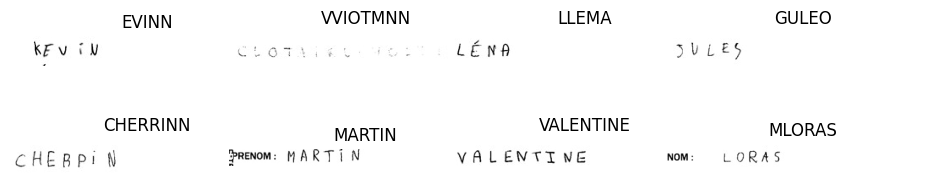

In [22]:
plt.figure(figsize = (12, 6))

for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    img_dir = '../input/handwriting-recognition/test_v2/test/' + test.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    
    image = image_preprocessing(image)
    image = image/255
    pred = model.predict(image.reshape(1, 256, 64, 1))
    decoded = K.get_value(K.ctc_decode(pred, input_length = np.ones(pred.shape[0])*pred.shape[1], greedy=True)[0][0])
    
    plt.title(num_to_name(decoded[0]), fontsize=12)
    plt.axis('off')
    
plt.subplots_adjust(wspace = -0.2, hspace = -0.7)

### Try Different Architecture for Comparison

In [30]:
new_model = tf.keras.Sequential([
          tf.keras.layers.Dense(units = 80, activation = 'relu', name = 'input_layer'),
          tf.keras.layers.Dense(units = 60, activation = 'relu', name = 'dense_layer1'),
          tf.keras.layers.Dense(units = 40, activation = 'relu', name = 'dense_layer2'),
          tf.keras.layers.Dense(units = 1, name = 'Output_layer')], name = 'Model')

new_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['binary_accuracy'])

In [31]:
new_history = new_model.fit(train_x, train_output, epochs=5, batch_size=128)

Epoch 1/5
235/235 [==============================] - 45s 185ms/step - loss: 6.5407e-04 - binary_accuracy: 1.0000
Epoch 2/5
235/235 [==============================] - 43s 185ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000
Epoch 4/5
235/235 [==============================] - 43s 185ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000


## Conclusion

In this project, we initially had tabulated data sets with file names and identity associated to each file name. We also had images with the same file names which contain hand written names.
For recongnize the handwriting to characters/words, we visually inspected the data for choosing what to do. We cleaned the data by removing null values and unreadable values. Then we pre-processed the images and english characters as well.
The first model built was a combination on CNN and RNN. We used CNN architecture with three layers and RNN architecture with two layers. The CTC loss function was defined. The model was trained and validated by checking the performance on the validation data set. The result of the prediction on the validation data were 55%. Finally we could made prediction on the test data set and displayed some examples from the work.
We tried another model beside the CRNN, and got better accuracy than the previous one.

### Discussion for Future Improvement

The process of the project was smooth and was doing well for making predictions. However, there is still possibility to do a better analysis. To use more samples for the training could improve the performance of the analysis. Or we could find better model to try different architectures.